✅ Loaded Prophet model for California
✅ Forecast generated for California
          Date  Predicted_Home_Price  Lower_Confidence_Interval  \
261 2018-01-31         196718.738355              123763.305262   
262 2018-02-28         197276.466276              131727.987163   
263 2018-03-31         198449.326554              125927.316761   
264 2018-04-30         197970.865047              127980.549844   
265 2018-05-31         200505.196816              125312.386412   
266 2018-06-30         199900.002443              122549.836702   
267 2018-07-31         200672.157887              130679.644077   
268 2018-08-31         201018.974680              125041.673510   
269 2018-09-30         201664.329631              128907.752901   
270 2018-10-31         203551.416616              127143.287571   
271 2018-11-30         205824.710124              129255.845917   
272 2018-12-31         204937.947646              129560.281526   

     Upper_Confidence_Interval  
261              2656

C:\Users\jvsti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


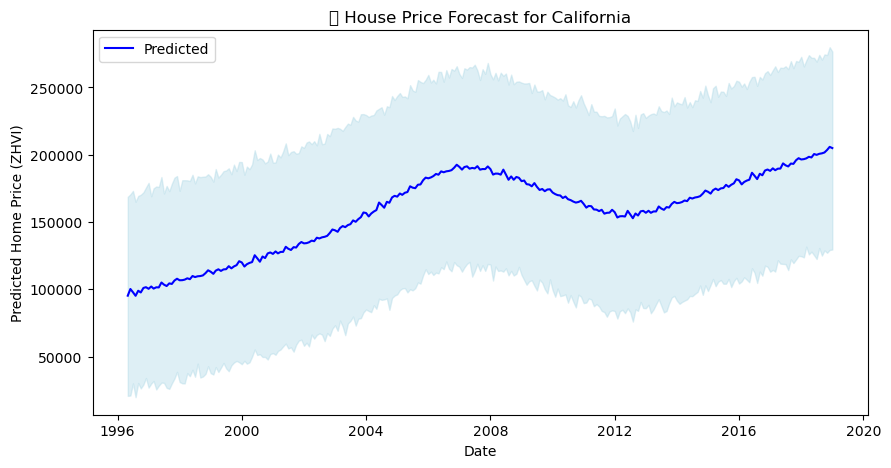

✅ Visualization complete!


In [18]:
# ==========================
# 🏠 Prophet House Price Prediction Script
# ==========================

import pandas as pd
from joblib import load
from prophet import Prophet
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
# Choose your target state
state = "California"   # 🔁 change to any of the 52 available states

# Load all pre-trained Prophet models
region_models = load("Prophet_AllRegions_Models.joblib")

# Check if the requested state is available
if state not in region_models:
    raise ValueError(f"❌ State '{state}' not found! Available states: {list(region_models.keys())}")

print(f"✅ Loaded Prophet model for {state}")

# Get the Prophet model for the chosen state
model = region_models[state]

# ---------- FORECAST ----------
# Create a future dataframe for the next 12 months
future = model.make_future_dataframe(periods=12, freq='ME')

# Predict using Prophet
forecast = model.predict(future)

# ---------- PERMANENT COLUMN RENAMING ----------
forecast.rename(columns={
    'ds': 'Date',
    'yhat': 'Predicted_Home_Price',
    'yhat_lower': 'Lower_Confidence_Interval',
    'yhat_upper': 'Upper_Confidence_Interval'
}, inplace=True)

# Keep relevant columns
forecast = forecast[['Date', 'Predicted_Home_Price', 
                     'Lower_Confidence_Interval', 'Upper_Confidence_Interval']]

print(f"✅ Forecast generated for {state}")
print(forecast.tail(12))  # show last 12 months of forecast

# ---------- SAVE TO CSV ----------
output_file = f"Forecast_{state}_House_Prices.csv"
forecast.to_csv(output_file, index=False)
print(f"💾 Saved forecast to '{output_file}'")

# ---------- OPTIONAL: PLOT ----------
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(forecast['Date'], forecast['Predicted_Home_Price'], label='Predicted', color='blue')
ax.fill_between(forecast['Date'], 
                forecast['Lower_Confidence_Interval'], 
                forecast['Upper_Confidence_Interval'], 
                color='lightblue', alpha=0.4)
ax.set_title(f"🏠 House Price Forecast for {state}")
ax.set_xlabel("Date")
ax.set_ylabel("Predicted Home Price (ZHVI)")
ax.legend()
plt.show()

print("✅ Visualization complete!")
